# Data Visualization

Here we visualize our results obtained.


In [1]:
import re
import numpy as np
from PIL import Image
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Download en_core_web_sm
from wordcloud import WordCloud, STOPWORDS
import spacy

/Users/danielevirzi/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/danielevirzi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Helper Functions

In [2]:
def P_data_cleaning(comments):
    # REMOVING PUNCTUATION
    comments = comments.str.replace('[^\w\s]', '')

    # REMOVING STOPWORDS
    stopword = set(STOPWORDS)
    comments = comments.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopword]))

    # REMOVING WORDS WITH LESS THAN 2 CHARACTERS
    comments = comments.apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

    return comments




In [3]:
def P_data_lemmatizing(comment, language):
    """ Usefull for the sentiment analysis and the word cloud.
       comment : the current comment to analyze ; string
       language : the language for tokenization ; string
    """
    if language.lower() == 'english':
      lemmatizer = spacy.load("en_core_web_sm")


    lemmatized_comment = ' '.join([token.lemma_ for token in lemmatizer(comment)])


    # After lemmatizing, some words are again higher cased
    lemmatized_comment = lemmatized_comment.lower()


    return lemmatized_comment

In [4]:
def assign_label(row):
    if row['Positive Score'] == max(row['Positive Score'], row['Neutral Score'], row['Negative Score']):
        return 'Positive'
    elif row['Neutral Score'] == max(row['Positive Score'], row['Neutral Score'], row['Negative Score']):
        return 'Neutral'
    else:
        return 'Negative'

In [5]:
def P_data_word_count(data, i=25):
    """Usefull for the see the most frequent words.
       data : data input : pd.Series
    """
    # explode() : convert each single element into a row
    # We also sort them to find the most common ones
    word_counts = data.str.split().explode().value_counts().sort_values(ascending = False)




    # We return the count aswell as the (lemmatized) words themselves
    return word_counts.head(i)

In [6]:
# Split the data in 4 parts  and return the 4 parts

def data_split(data):
    """Split the data in 4 parts and return the 4 parts
       data : data input : pd.Series
    """
    # We split the data into 4 parts
    data_1 = data[:len(data)//4]
    data_2 = data[len(data)//4:2*len(data)//4]
    data_3 = data[2*len(data)//4:3*len(data)//4]
    data_4 = data[3*len(data)//4:]

    return data_1, data_2, data_3, data_4


## EDA

In [7]:
# Define the path
data90 = pd.read_csv('combined_original_under_90.csv')
data90to95 = pd.read_csv('combined_original_90_to_95.csv')
data95to100 = pd.read_csv('combined_original_95_to_100.csv')

# Concatenate the data
data = pd.concat([data90, data90to95, data95to100])

# Count the rows
data.shape

(18339, 4)

In [8]:
# Replace the label 0 by Negative and 2 by Positive
data['Label'] = data['Label'].replace(0, 'Negative')
data['Label'] = data['Label'].replace(2, 'Positive')

In [9]:
data_1, data_2, data_3, data_4 = data_split(data.head(1000))

In [10]:
# Check the data
data_1.head()

,Unnamed: 0,Comment,Label,Score
0,7,"you guns all make great points, crying online ...",Negative,0.895451
1,29,in more afraid of democrats than i am of some ...,Negative,0.865466
2,47,now! this ai is great at firing out ai and oth...,Negative,0.882388
3,73,% the doom of humanity... just as the bible st...,Negative,0.876592
4,112,we are getting very close to the time the grea...,Negative,0.899060


/var/folders/vl/zqr5_x4s345b31bjh6wnsv9c0000gn/T/ipykernel_2882/1571755977.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Label', y='Count', data=data_grouped_1, palette=['tab:red', 'tab:green'], ax=axs[0, 0])
/var/folders/vl/zqr5_x4s345b31bjh6wnsv9c0000gn/T/ipykernel_2882/1571755977.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Label', y='Count', data=data_grouped_2, palette=['tab:red', 'tab:green'], ax=axs[0, 1])
/var/folders/vl/zqr5_x4s345b31bjh6wnsv9c0000gn/T/ipykernel_2882/1571755977.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effe

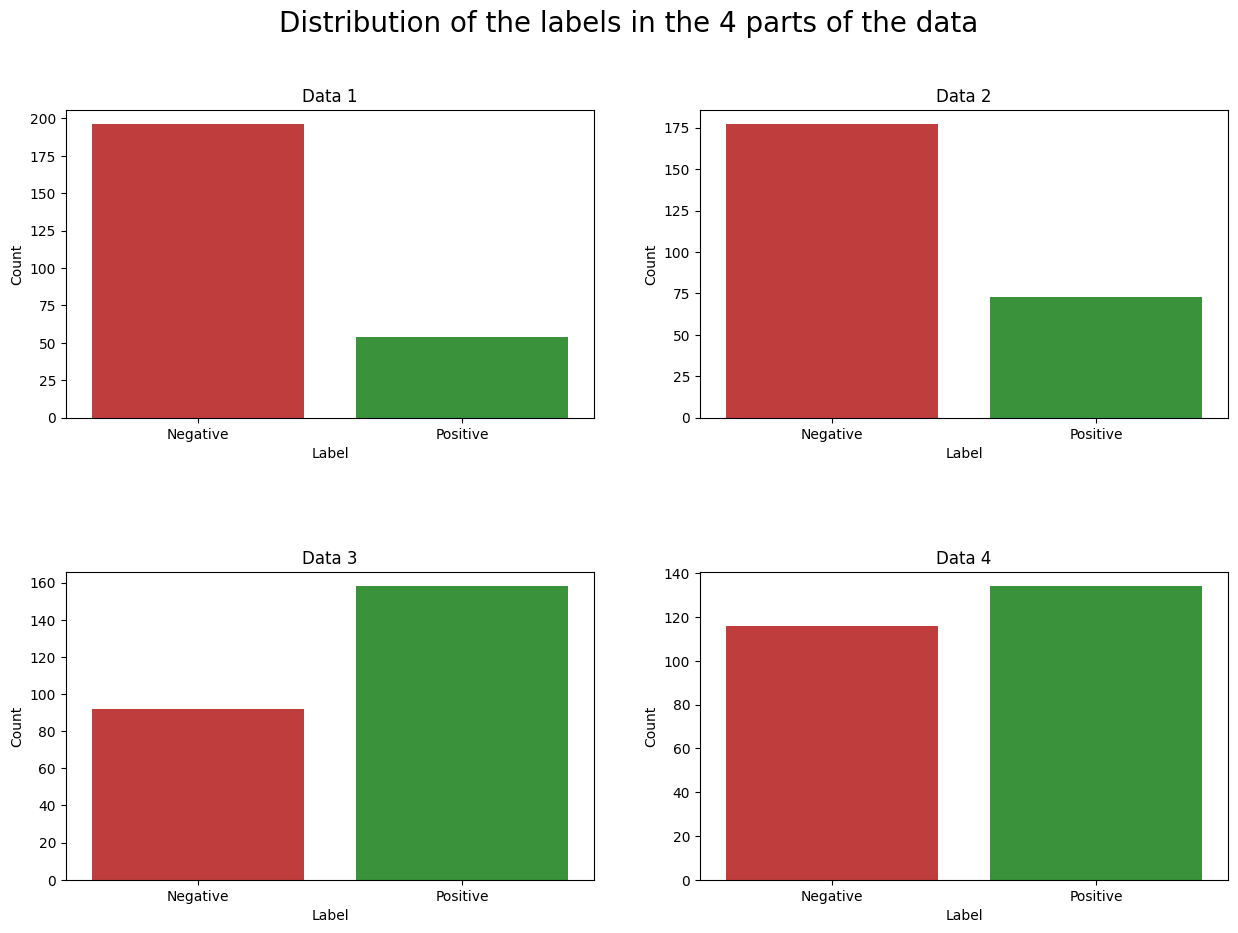

In [11]:
#  Group the data by the label
data_grouped_1 = data_1.groupby('Label').size().reset_index(name='Count')
data_grouped_2 = data_2.groupby('Label').size().reset_index(name='Count')
data_grouped_3 = data_3.groupby('Label').size().reset_index(name='Count')
data_grouped_4 = data_4.groupby('Label').size().reset_index(name='Count')


# Plot the subplots of the data grouped by the label
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Distribution of the labels in the 4 parts of the data', fontsize=20)
sns.barplot(x='Label', y='Count', data=data_grouped_1, palette=['tab:red', 'tab:green'], ax=axs[0, 0])
axs[0, 0].set_title('Data 1')
sns.barplot(x='Label', y='Count', data=data_grouped_2, palette=['tab:red', 'tab:green'], ax=axs[0, 1])
axs[0, 1].set_title('Data 2')
sns.barplot(x='Label', y='Count', data=data_grouped_3, palette=['tab:red', 'tab:green'], ax=axs[1, 0])
axs[1, 0].set_title('Data 3')
sns.barplot(x='Label', y='Count', data=data_grouped_4, palette=['tab:red', 'tab:green'], ax=axs[1, 1])
axs[1, 1].set_title('Data 4')
plt.show()

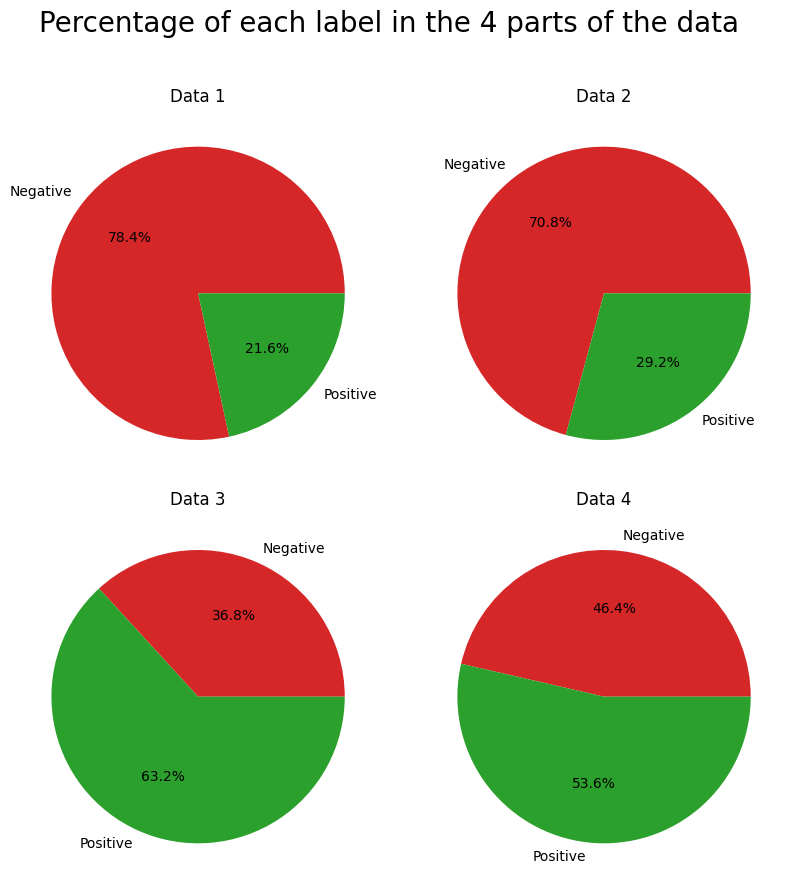

In [12]:
# Plot a pie chart with the percentage of each label for each part of the data
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.suptitle('Percentage of each label in the 4 parts of the data', fontsize=20)
axs[0, 0].pie(data_grouped_1['Count'], labels=data_grouped_1['Label'], autopct='%1.1f%%', colors=['tab:red', 'tab:green'])
axs[0, 0].set_title('Data 1')
axs[0, 1].pie(data_grouped_2['Count'], labels=data_grouped_2['Label'], autopct='%1.1f%%', colors=['tab:red', 'tab:green'])
axs[0, 1].set_title('Data 2')
axs[1, 0].pie(data_grouped_3['Count'], labels=data_grouped_3['Label'], autopct='%1.1f%%', colors=['tab:red', 'tab:green'])
axs[1, 0].set_title('Data 3')
axs[1, 1].pie(data_grouped_4['Count'], labels=data_grouped_4['Label'], autopct='%1.1f%%', colors=['tab:red', 'tab:green'])
axs[1, 1].set_title('Data 4')
plt.show()

In [13]:
# Lemmatize the dataset
data_1['Lemmatized Comment'] = data_1['Comment'].apply(lambda x : P_data_lemmatizing(x, language = 'english'))
data_2['Lemmatized Comment'] = data_2['Comment'].apply(lambda x : P_data_lemmatizing(x, language = 'english'))
data_3['Lemmatized Comment'] = data_3['Comment'].apply(lambda x : P_data_lemmatizing(x, language = 'english'))
data_4['Lemmatized Comment'] = data_4['Comment'].apply(lambda x : P_data_lemmatizing(x, language = 'english'))



In [14]:
# Clean the data
data_1['Cleaned Comments'] = P_data_cleaning(data_1['Lemmatized Comment'])
data_2['Cleaned Comments'] = P_data_cleaning(data_2['Lemmatized Comment'])
data_3['Cleaned Comments'] = P_data_cleaning(data_3['Lemmatized Comment'])
data_4['Cleaned Comments'] = P_data_cleaning(data_4['Lemmatized Comment'])

/var/folders/vl/zqr5_x4s345b31bjh6wnsv9c0000gn/T/ipykernel_2882/1771476626.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  comments = comments.str.replace('[^\w\s]', '')
/var/folders/vl/zqr5_x4s345b31bjh6wnsv9c0000gn/T/ipykernel_2882/1771476626.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  comments = comments.str.replace('[^\w\s]', '')
/var/folders/vl/zqr5_x4s345b31bjh6wnsv9c0000gn/T/ipykernel_2882/1771476626.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  comments = comments.str.replace('[^\w\s]', '')
/var/folders/vl/zqr5_x4s345b31bjh6wnsv9c0000gn/T/ipykernel_2882/1771476626.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  comments = comments.str.replace('[^\w\s]', '')


In [15]:
sample = 25

# Gradient color palette viridis
colors = sns.light_palette("seagreen", sample, reverse=True)



/var/folders/vl/zqr5_x4s345b31bjh6wnsv9c0000gn/T/ipykernel_2882/4229307924.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_words_count_1.values, y=data_words_count_1.index, palette=colors, ax=axs[0, 0])
/var/folders/vl/zqr5_x4s345b31bjh6wnsv9c0000gn/T/ipykernel_2882/4229307924.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_words_count_2.values, y=data_words_count_2.index, palette=colors, ax=axs[0, 1])
/var/folders/vl/zqr5_x4s345b31bjh6wnsv9c0000gn/T/ipykernel_2882/4229307924.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  s

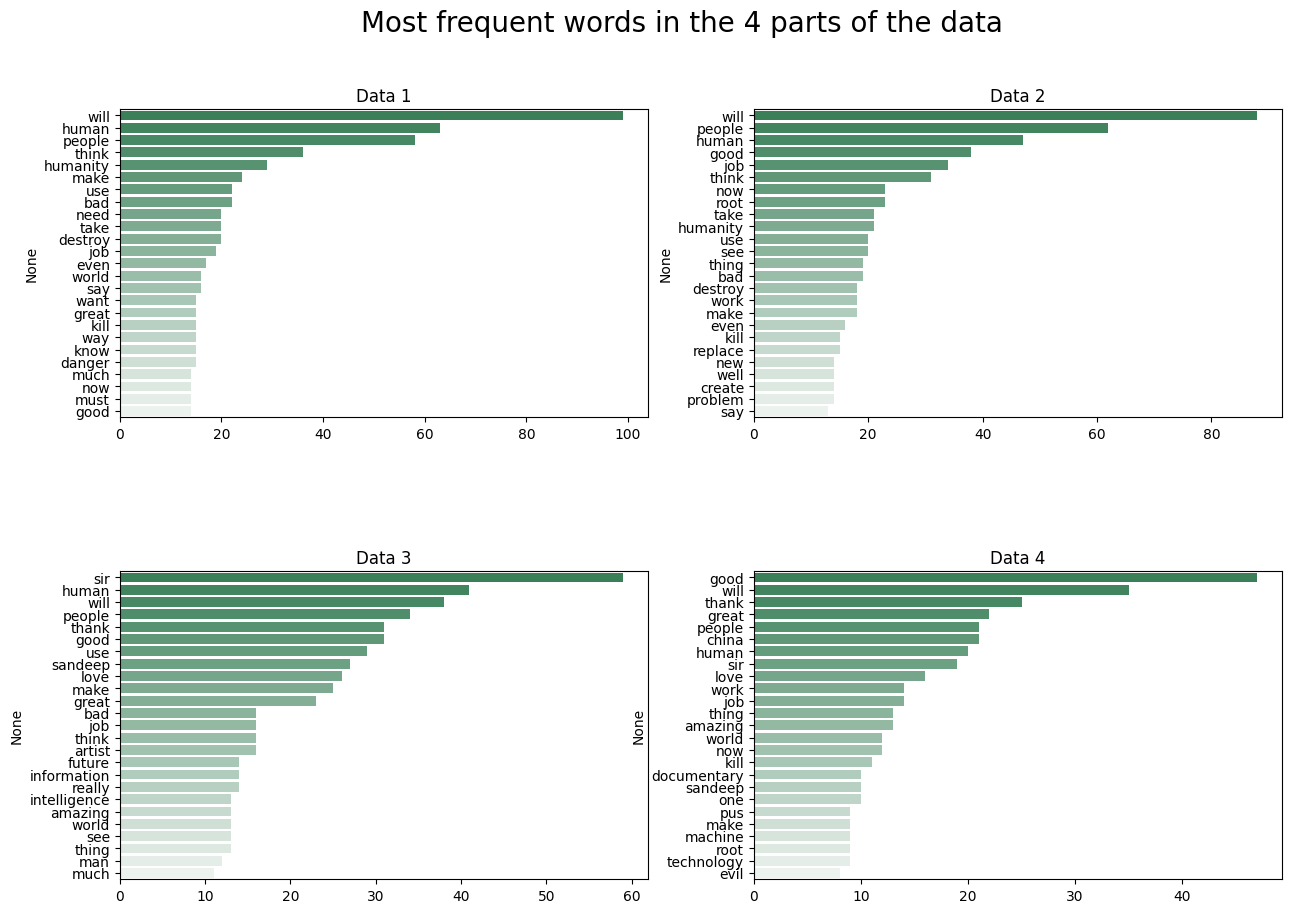

"\nplt.figure(figsize=(10, 6))\nsns.barplot(x=data_words_count.values, y=data_words_count.index, palette=colors)\nplt.title('Most frequent words')\nplt.ylabel('')\nplt.show()\n"

In [17]:
# See the most frequent words
data_words_count_1 = P_data_word_count(data_1['Cleaned Comments'], sample)
data_words_count_2 = P_data_word_count(data_2['Cleaned Comments'], sample)
data_words_count_3 = P_data_word_count(data_3['Cleaned Comments'], sample)
data_words_count_4 = P_data_word_count(data_4['Cleaned Comments'], sample)

# Plot the most frequent words in horizontal bar chart, sorted by frequency for each part of the data in subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Most frequent words in the 4 parts of the data', fontsize=20)
sns.barplot(x=data_words_count_1.values, y=data_words_count_1.index, palette=colors, ax=axs[0, 0])
axs[0, 0].set_title('Data 1')
sns.barplot(x=data_words_count_2.values, y=data_words_count_2.index, palette=colors, ax=axs[0, 1])
axs[0, 1].set_title('Data 2')
sns.barplot(x=data_words_count_3.values, y=data_words_count_3.index, palette=colors, ax=axs[1, 0])
axs[1, 0].set_title('Data 3')
sns.barplot(x=data_words_count_4.values, y=data_words_count_4.index, palette=colors, ax=axs[1, 1])
axs[1, 1].set_title('Data 4')
plt.show()




'''
plt.figure(figsize=(10, 6))
sns.barplot(x=data_words_count.values, y=data_words_count.index, palette=colors)
plt.title('Most frequent words')
plt.ylabel('')
plt.show()
'''


In [18]:
youtube_mask = np.array(Image.open('./Youtube_logo.png'))
youtube_mask


array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [19]:
# Wordcloud with positive comments
positive_comments_1 = data_1[data_1["Label"] == 'Positive']['Cleaned Comments']
positive_comments_2 = data_2[data_2["Label"] == 'Positive']['Cleaned Comments']
positive_comments_3 = data_3[data_3["Label"] == 'Positive']['Cleaned Comments']
positive_comments_4 = data_4[data_4["Label"] == 'Positive']['Cleaned Comments']

stop_words = list(STOPWORDS)
positive_wordcloud_1 = WordCloud(max_font_size=75, 
                                 max_words=10000, 
                                 background_color="white", 
                                 stopwords = stop_words,
                                 mask=youtube_mask, 
                                 colormap='Greens', 
                                 contour_color = 'white', 
                                 width = 800, 
                                 height = 500).generate(str(list(positive_comments_1)))

positive_wordcloud_2 = WordCloud(max_font_size=75,
                                    max_words=10000,
                                    background_color="white",
                                    stopwords = stop_words,
                                    mask=youtube_mask,
                                    colormap='Greens',
                                    contour_color = 'white',
                                    width = 800,
                                    height = 500).generate(str(list(positive_comments_2)))

positive_wordcloud_3 = WordCloud(max_font_size=75,
                                    max_words=10000,
                                    background_color="white",
                                    stopwords = stop_words,
                                    mask=youtube_mask,
                                    colormap='Greens',
                                    contour_color = 'white',
                                    width = 800,
                                    height = 500).generate(str(list(positive_comments_3)))

positive_wordcloud_4 = WordCloud(max_font_size=75,
                                    max_words=10000,
                                    background_color="white",
                                    stopwords = stop_words,
                                    mask=youtube_mask,
                                    colormap='Greens',
                                    contour_color = 'white',
                                    width = 800,
                                    height = 500).generate(str(list(positive_comments_4)))


In [21]:
# Wordcloud with negative comments
negative_comments_1 = data_1[data_1["Label"] == 'Negative']['Cleaned Comments']
negative_comments_2 = data_2[data_2["Label"] == 'Negative']['Cleaned Comments']
negative_comments_3 = data_3[data_3["Label"] == 'Negative']['Cleaned Comments']
negative_comments_4 = data_4[data_4["Label"] == 'Negative']['Cleaned Comments']

stop_words = list(STOPWORDS)
negative_wordcloud_1 = WordCloud(max_font_size=75,
                                max_words=10000,
                                background_color="white", 
                                stopwords = stop_words, 
                                mask=youtube_mask, 
                                colormap='Reds', 
                                contour_color = 'white', 
                                width = 800, 
                                height = 500).generate(str(list(negative_comments_1)))

negative_wordcloud_2 = WordCloud(max_font_size=75,
                                    max_words=10000,
                                    background_color="white",
                                    stopwords = stop_words,
                                    mask=youtube_mask,
                                    colormap='Reds',
                                    contour_color = 'white',
                                    width = 800,
                                    height = 500).generate(str(list(negative_comments_2)))

negative_wordcloud_3 = WordCloud(max_font_size=75,
                                    max_words=10000,
                                    background_color="white",
                                    stopwords = stop_words,
                                    mask=youtube_mask,
                                    colormap='Reds',
                                    contour_color = 'white',
                                    width = 800,
                                    height = 500).generate(str(list(negative_comments_3)))

negative_wordcloud_4 = WordCloud(max_font_size=75,
                                    max_words=10000,
                                    background_color="white",
                                    stopwords = stop_words,
                                    mask=youtube_mask,
                                    colormap='Reds',
                                    contour_color = 'white',
                                    width = 800,
                                    height = 500).generate(str(list(negative_comments_4)))

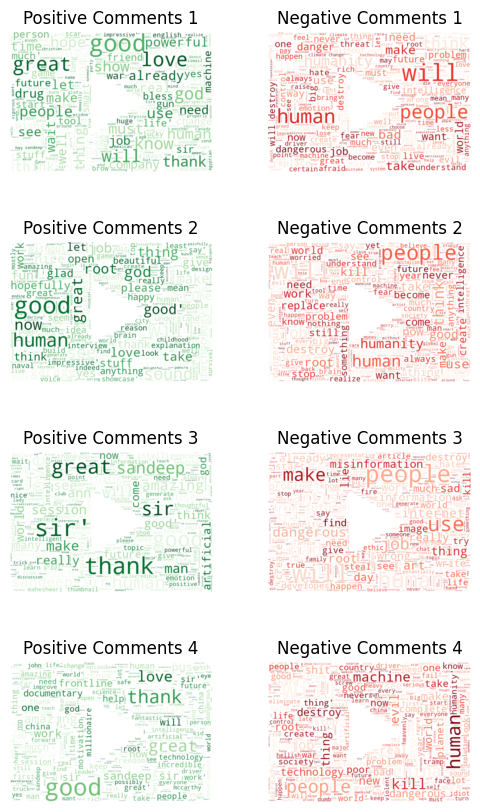

"\nax[0].imshow(positive_wordcloud, interpolation='bilinear')\nax[0].axis('off')\nax[0].set_title('Positive Comments')\nax[1].imshow(negative_wordcloud, interpolation='bilinear')\nax[1].axis('off')\nax[1].set_title('Negative Comments')\nplt.show()\n\n"

In [24]:
# Plot the wordclouds
fig, ax = plt.subplots(4, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5, wspace=-0.5)
ax[0, 0].imshow(positive_wordcloud_1, interpolation='bilinear')
ax[0, 0].axis('off')
ax[0, 0].set_title('Positive Comments 1')
ax[0, 1].imshow(negative_wordcloud_1, interpolation='bilinear')
ax[0, 1].axis('off')
ax[0, 1].set_title('Negative Comments 1')
ax[1, 0].imshow(positive_wordcloud_2, interpolation='bilinear')
ax[1, 0].axis('off')
ax[1, 0].set_title('Positive Comments 2')
ax[1, 1].imshow(negative_wordcloud_2, interpolation='bilinear')
ax[1, 1].axis('off')
ax[1, 1].set_title('Negative Comments 2')
ax[2, 0].imshow(positive_wordcloud_3, interpolation='bilinear')
ax[2, 0].axis('off')
ax[2, 0].set_title('Positive Comments 3')
ax[2, 1].imshow(negative_wordcloud_3, interpolation='bilinear')
ax[2, 1].axis('off')
ax[2, 1].set_title('Negative Comments 3')
ax[3, 0].imshow(positive_wordcloud_4, interpolation='bilinear')
ax[3, 0].axis('off')
ax[3, 0].set_title('Positive Comments 4')
ax[3, 1].imshow(negative_wordcloud_4, interpolation='bilinear')
ax[3, 1].axis('off')
ax[3, 1].set_title('Negative Comments 4')
plt.show()









'''
ax[0].imshow(positive_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Positive Comments')
ax[1].imshow(negative_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Negative Comments')
plt.show()

'''